![](https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2021/03/chaitali-majumder/house-price-497112-KhCJQICS.jpg)

# Introduction
## The goal is to predict sale prices for homes in Ames, Iowa. We’re given a training and testing data set in csv format as well as a data dictionary.This is an advanced regression use case.

## Importing the required packages

In [7]:
!pip install xgboost

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
sns.set(style='ticks', color_codes = True)

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Importing DataSet

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Appending train and test for ease of data cleaning

In [11]:
df = train.append(test , sort = True)

## some data exploration

In [12]:
print('Train:',train.shape)
print('Test:',test.shape)
print('DataFrame:',df.shape)

Train: (1460, 81)
Test: (1459, 80)
DataFrame: (2919, 81)


In [13]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [14]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
Functional          2
GarageArea          1
GarageCars          1
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
HouseStyle          0
Id                  0
KitchenAbvGr        0
KitchenQua

## there are a lot of missing values, let's seperate columns into numerical and categorical

In [15]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea       float64
GarageCars       float64
GarageCond        object
GarageFinish      object
GarageQual        object
GarageType        object
GarageYrBlt      float64
GrLivArea          int64
HalfBath           int64


In [16]:
cat = list(df.select_dtypes('object'))
num = list(df.select_dtypes(['int64','float64']))

In [17]:
cat

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [18]:
num

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [19]:
na = df[num].isnull().sum()
na = na[na > 0]
na = na.sort_values(ascending=False)
print(na)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64


In [20]:
na = df[cat].isnull().sum()
na = na[na > 0]
na = na.sort_values(ascending=False)
print(na)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Electrical         1
Exterior1st        1
Exterior2nd        1
SaleType           1
KitchenQual        1
dtype: int64


## Numerical columns missing values

In [21]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)
df.GarageYrBlt.fillna(0, inplace=True)

## above we replaced missing values in LotFrontage with median so that donot change shape of data
## in GarageYrBlt null value means there is no garage so we replaced it with 0.
## in all other numerical columns null value indicate not available so we replace it with 0 below.

In [22]:
df.MasVnrArea.fillna(0, inplace=True)    
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)    
df.TotalBsmtSF.fillna(0, inplace=True)   
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True) 

In [23]:
df[num].isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFullBath        0
BsmtHalfBath        0
BsmtUnfSF           0
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          0
GarageCars          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         0
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

so all missing values treated exept SalePrice, Here SalePrice is that of test data which we have to predict.

Categorical columns missing values

In [24]:
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)     
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 

## all these columns similar to numerical column where null value meant not available we replace it with NA or None according to the data dictionary and rest we fill the mode.

In [25]:
df.Functional.fillna(df.Functional.mode()[0], inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True) 
df.MSZoning.fillna(df.MSZoning.mode()[0], inplace=True)

In [26]:
df[cat].isnull().sum()

Alley            0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
MiscFeature      0
Neighborhood     0
PavedDrive       0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

## all null values treated with no missing variable currently.

In [27]:
def boxplot(var):
    sns.catplot(x=var, y='SalePrice',data = train, kind='box')

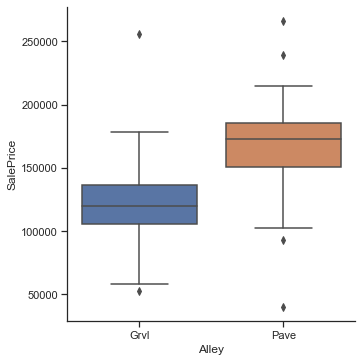

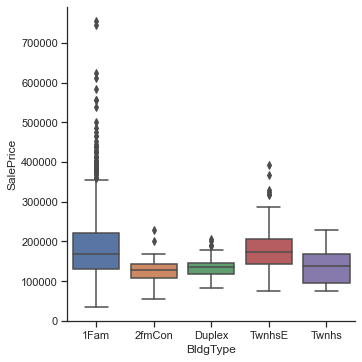

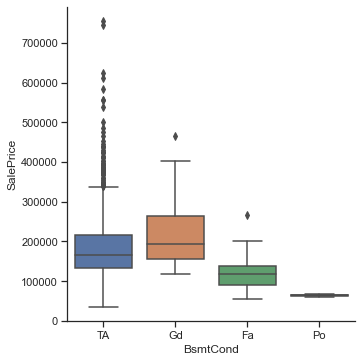

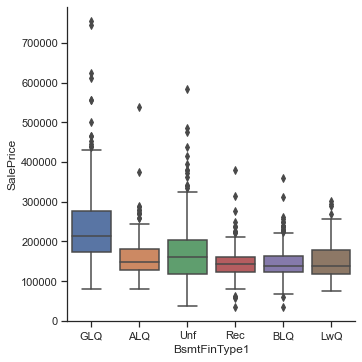

In [28]:
boxplot('Alley')
boxplot('BldgType')
boxplot('BsmtCond')
boxplot('BsmtFinType1')

## Alley has a impact on price as we can see from boxplot. 
## BldgType,BsmtCond,BsmtFinType1 has a very small impact.

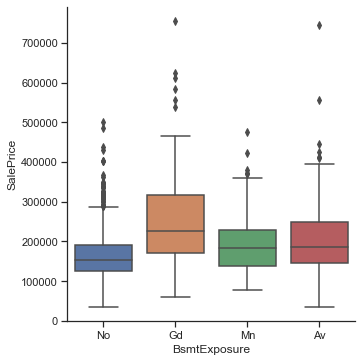

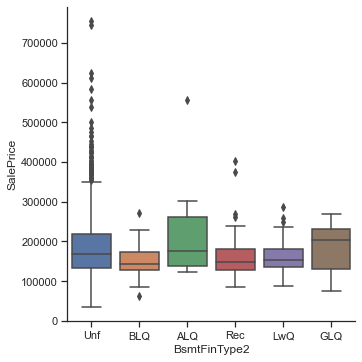

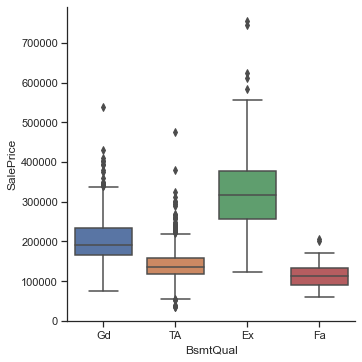

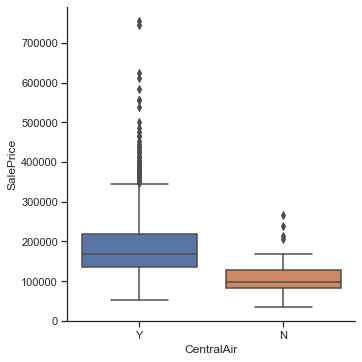

In [29]:
boxplot('BsmtExposure')
boxplot('BsmtFinType2')
boxplot('BsmtQual')
boxplot('CentralAir')

## CentralAir,BsmtQual has a impact on price as we can see from boxplot. BsmtFinType2,BsmtExposure has a very small impact.

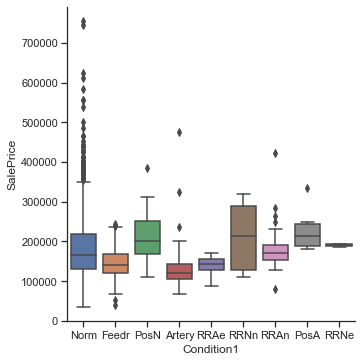

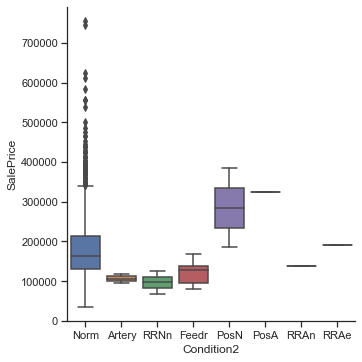

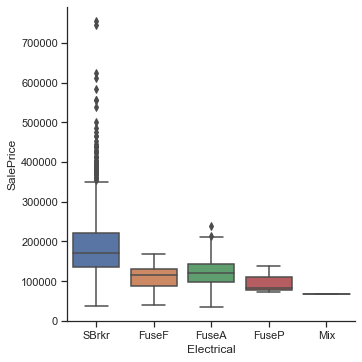

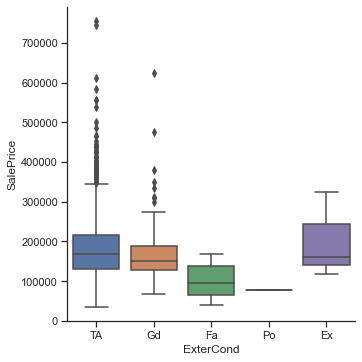

In [30]:
boxplot('Condition1')
boxplot('Condition2')
boxplot('Electrical')
boxplot('ExterCond')

## ExterCond,Condition2,Condition1 has a impact on price as we can see from boxplot. Electrical has a very small impact.

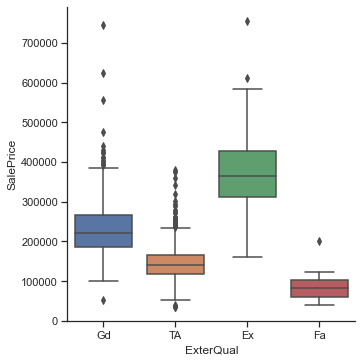

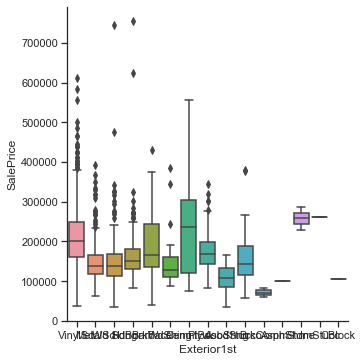

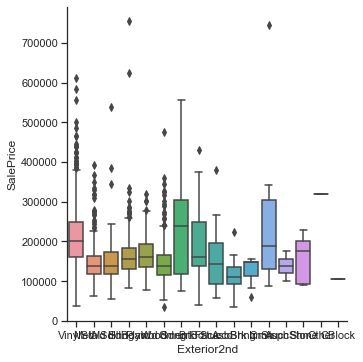

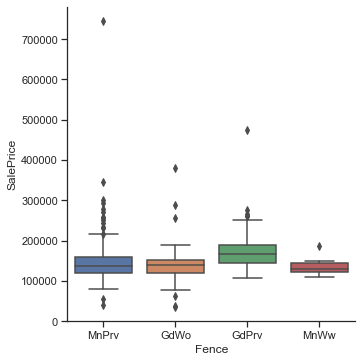

In [31]:
boxplot('ExterQual')
boxplot('Exterior1st')
boxplot('Exterior2nd')
boxplot('Fence')

## ExterQual has a impact on price as we can see from boxplot. Fence,Exterior1st,Exterior2nd has a very small impact.

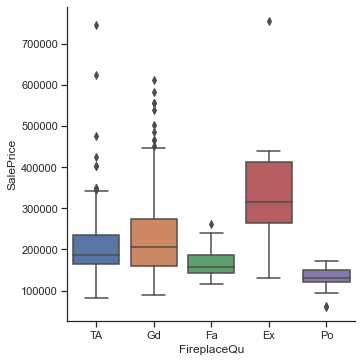

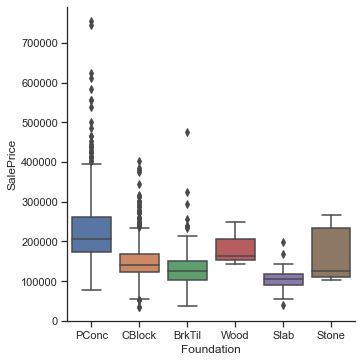

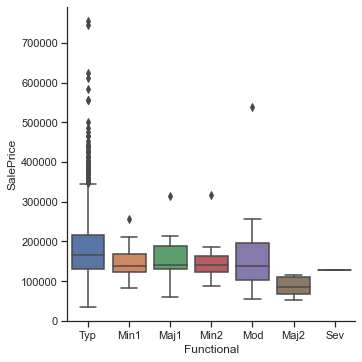

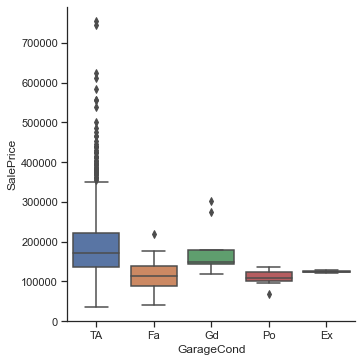

In [32]:
boxplot('FireplaceQu')
boxplot('Foundation')
boxplot('Functional')
boxplot('GarageCond')

## FireplaceQu,Foundation,Functional,GarageCond has a very small impact. also excellent fireplacequal shows a jump in price.

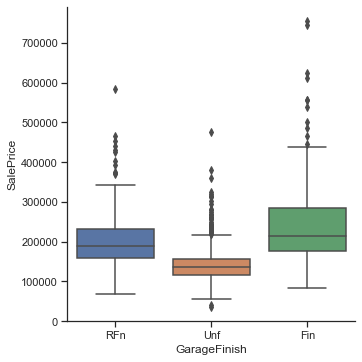

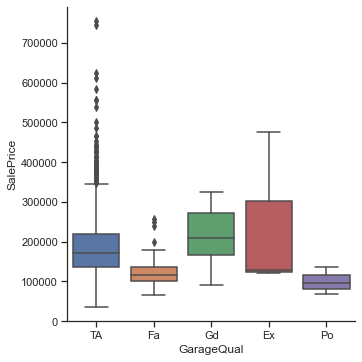

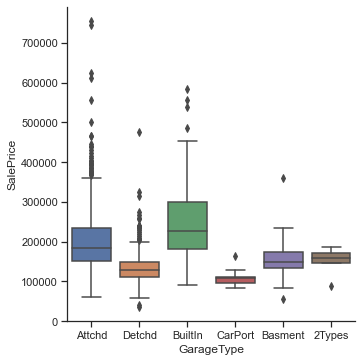

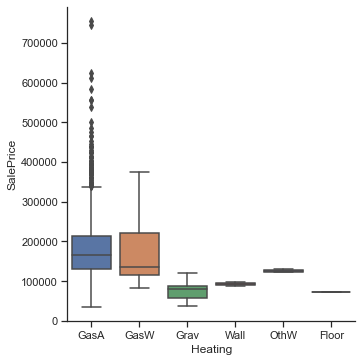

In [33]:
boxplot('GarageFinish')
boxplot('GarageQual')
boxplot('GarageType')
boxplot('Heating')

## GarageQual,GarageFinish has a impact on price as we can see from boxplot. Heating,GarageType has a very small impact.

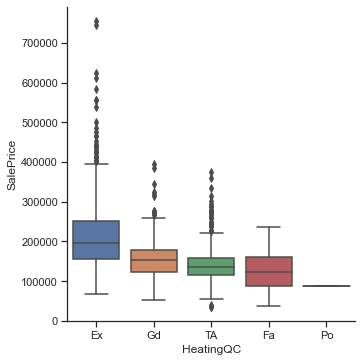

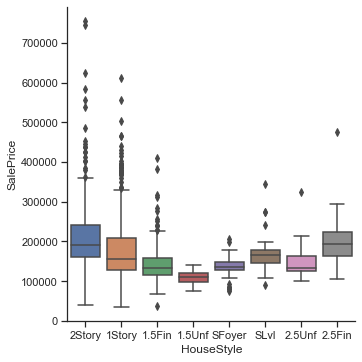

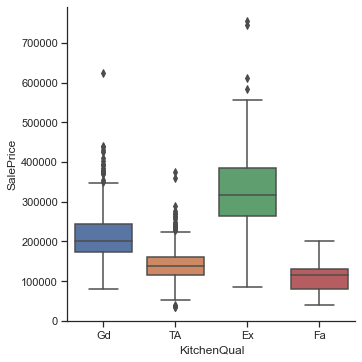

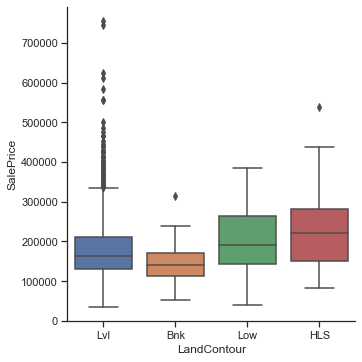

In [34]:
boxplot('HeatingQC')
boxplot('HouseStyle')
boxplot('KitchenQual')
boxplot('LandContour')

## HouseStyle,KitchenQual has a impact on price as we can see from boxplot. LandContour,HeatingQC has a very small impact.

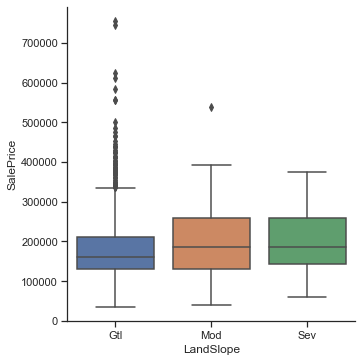

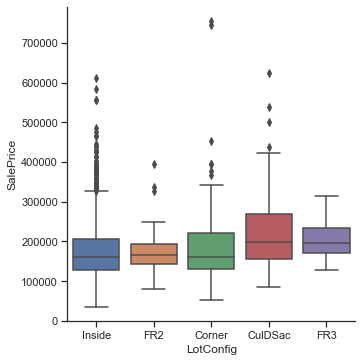

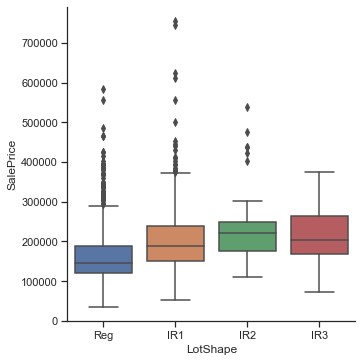

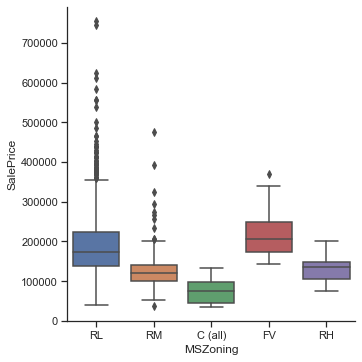

In [35]:
boxplot('LandSlope')
boxplot('LotConfig')
boxplot('LotShape')
boxplot('MSZoning')

## MSZoning has a impact on price as we can see from boxplot. LotShape,LotConfig,LandSlope has no impact.

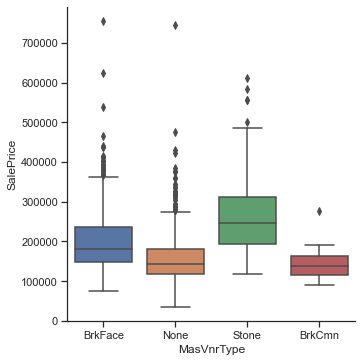

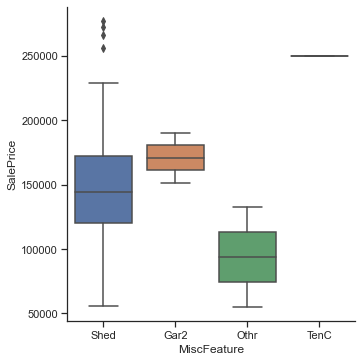

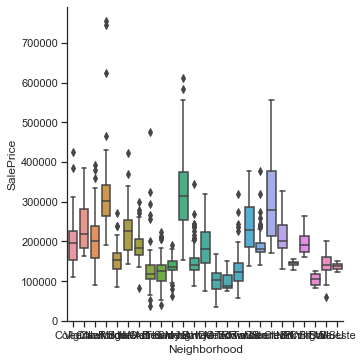

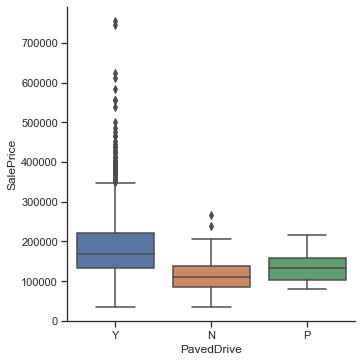

In [36]:
boxplot('MasVnrType')
boxplot('MiscFeature')
boxplot('Neighborhood')
boxplot('PavedDrive')

## PavedDrive,Neighborhood,MiscFeature has a impact on price. MasVnrType has a very small impact,changes drastically with stone.

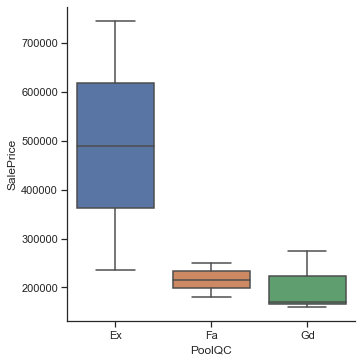

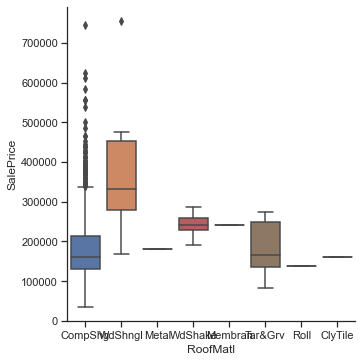

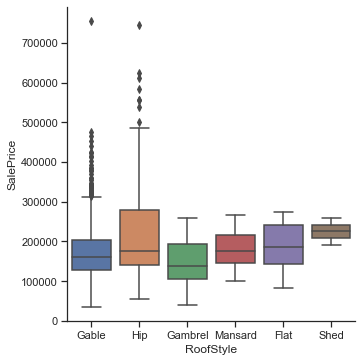

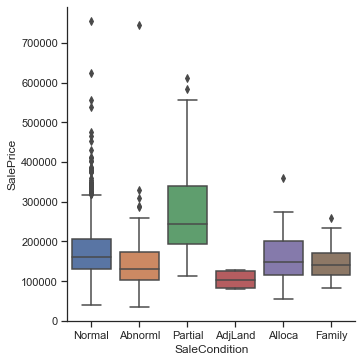

In [37]:
boxplot('PoolQC')
boxplot('RoofMatl')
boxplot('RoofStyle')
boxplot('SaleCondition')

## RoofStyle,RoofMatl,PoolQC has a impact on price as we can see from boxplot. SaleCondition has a very small impact and increase with Partial.

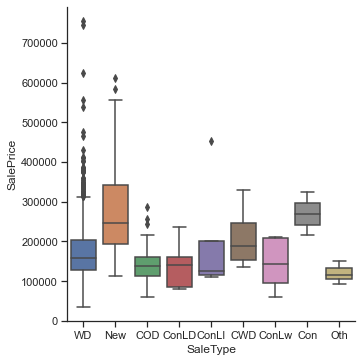

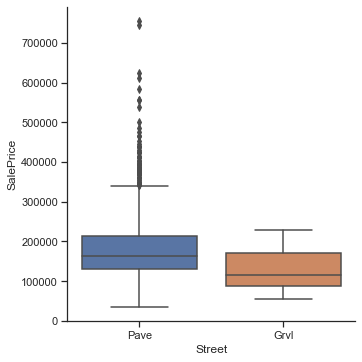

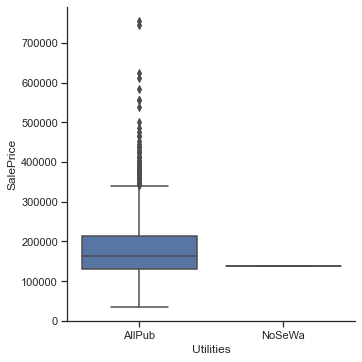

In [38]:
boxplot('SaleType')
boxplot('Street')
boxplot('Utilities')

## SaleType has a impact on price as we can see from boxplot. Street,Utilities has a very small impact.

#### High Dependency:
CentralAir  
BsmtQual  
Alley  
ExterCond  
Condition2  
Condition1  
ExterQual  
GarageQual  
GarageFinish  
HouseStyle  
KitchenQual  
MSZoning  
PavedDrive  
Neighborhood  
MiscFeature  
RoofStyle  
RoofMatl  
PoolQC  
SaleType  

#### Modarate Dependency:
BldgType 
BsmtCond  
BsmtFinType1  
BsmtFinType2  
BsmtExposure  
Electrical  
Fence  
Exterior1st  
Exterior2nd  
FireplaceQu  
Foundation  
Functional  
GarageCond  
Heating  
GarageType  
LandContour  
HeatingQC  
SaleCondition   
Street  
Utilities  

#### Low Dependency:
LotShape  
LotConfig  
LandSlope  
MasVnrType  

## Plotting the heatmap

<AxesSubplot:>

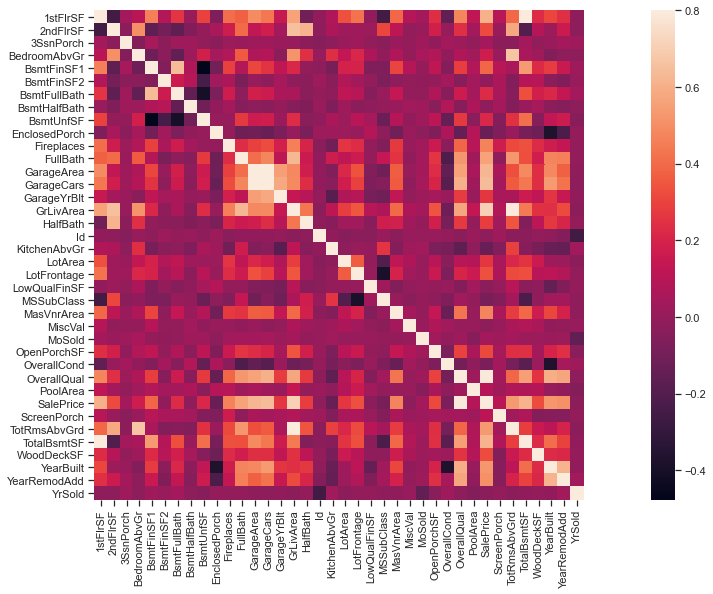

In [39]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(24, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

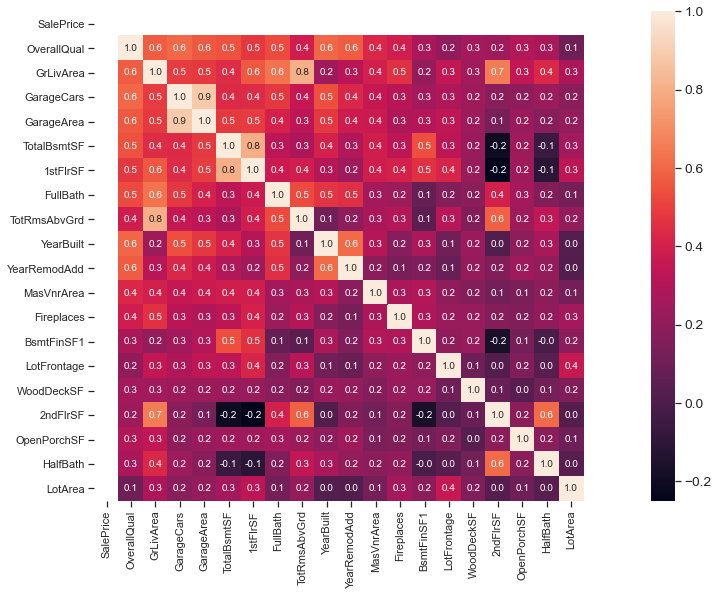

In [40]:
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(24, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### High Correlated
OverallQual  
GrLivArea  
GarageCars  
TotalBsmtSF  
1stFlrSF  
FullBath  
TotRmsAbvGrd  
YearBuilt  
YrRemodAdd  
MasVnrArea   
Fireplaces  
BsmtFinSF1  
LotFrontage  
WoodDeckSF  
2ndFlrSF  
OpenPorchSF  
HalfBath  
LotArea  
        

It's needed to create dummy vars and map categorical features in order to run ML model.

## Creating mapping for categorical features that can be ranked.

In [41]:
df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

In [42]:
new_num = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
num = num + new_num
for i in new_num:
    cat.remove(i)

## all these are now numerical so added to num list and removed from cat list.

In [43]:
num

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'LandSlope',
 'PavedDrive',
 'PoolQC',
 'Street',
 'Utilities']

In [44]:
cat

['BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'GarageFinish',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType']

## mssubclass is a categorical data not numerical therefore we can map it to category.

In [45]:
df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

In [46]:
num.remove('MSSubClass')
cat.append('MSSubClass')

## there are 4 year specifing columns.It would be more helpful if it showed how long back building built or just age of building.

In [47]:
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

## there can be -ve values if no garage build.

In [48]:
max_AgeGarage = np.max(df.AgeGarage[df.AgeGarage < 1000])
df['AgeGarage'] = df['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

df.Age = df.Age.map(lambda x: 0 if x < 0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x < 0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x < 0 else x)

In [49]:
df=df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

for i in ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']: 
    num.remove(i)
num = num + ['Age','AgeRemod','AgeGarage']

## Creating dummy for categorical features that cannot be ranked.

In [50]:
dummy_drop = []
for i in cat:
    dummy_drop += [ i+'_'+str(df[i].unique()[-1]) ]

df = pd.get_dummies(df,columns=cat) 
df = df.drop(dummy_drop,axis=1)

In [51]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageQual,GrLivArea,HalfBath,HeatingQC,Id,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,Age,AgeRemod,AgeGarage,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_NA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,MSSubClass_class1,MSSubClass_class10,MSSubClass_class11,MSSubClass_class12,MSSubClass_class14,MSSubClass_class15,MSSubClass_class16,MSSubClass_class2,MSSubClass_class3,MSSubClass_class4,MSSubClass_class5,MSSubClass_class6,MSSubClass_class7,MSSubClass_class8,MSSubClass_class9
0,856,854,0,0,3,3,1,706.0,0.0,6,1,1.0,0.0,4,150.0,0,3,4,0,0,2,8,548.0,2.0,3,3,1710,1,5,1,1,4,3,8450,65.0,0,196.0,0,2,61,5,7,3,0,0,208500.0,0,2,8,856.0,4,0,5,5,5.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [52]:
df.dtypes

1stFlrSF                   int64
2ndFlrSF                   int64
3SsnPorch                  int64
Alley                      int64
BedroomAbvGr               int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtFinType1               int64
BsmtFinType2               int64
BsmtFullBath             float64
BsmtHalfBath             float64
BsmtQual                   int64
BsmtUnfSF                float64
EnclosedPorch              int64
ExterCond                  int64
ExterQual                  int64
FireplaceQu                int64
Fireplaces                 int64
FullBath                   int64
Functional                 int64
GarageArea               float64
GarageCars               float64
GarageCond                 int64
GarageQual                 int64
GrLivArea                  int64
HalfBath                   int64
HeatingQC                  int64
Id                         int64
KitchenAbv

In [53]:
df.shape

(2919, 224)

## Spliting dataset train as first 1460 rows and test as last 1459 rows because we appended a train and test earilier.

In [54]:
X_train  = df[:-1459].drop(['SalePrice','Id'], axis=1)
y_train  = df[:-1459]['SalePrice']
X_test  = df[-1459:].drop(['SalePrice','Id'], axis=1)

In [55]:
from xgboost import XGBRegressor

## Training the model

In [56]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
xgb.score(X_train, y_train)

0.9993649439057072

## we have to take only few features as to improve model.

In [58]:
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)

In [59]:
imp

,Importance
OverallQual,0.446473
GarageCars,0.135958
CentralAir_Y,0.059187
GrLivArea,0.028329
MSZoning_RM,0.027766
KitchenAbvGr,0.020193
TotalBsmtSF,0.020160
RoofMatl_CompShg,0.017258
BsmtQual,0.016712
GarageQual,0.015863


In [60]:
feat_sel = imp[:56]

In [61]:
feat_list = feat_sel.index.tolist

In [62]:
feat_list()

['OverallQual',
 'GarageCars',
 'CentralAir_Y',
 'GrLivArea',
 'MSZoning_RM',
 'KitchenAbvGr',
 'TotalBsmtSF',
 'RoofMatl_CompShg',
 'BsmtQual',
 'GarageQual',
 'KitchenQual',
 'FullBath',
 'MSZoning_RL',
 'Alley',
 'GarageType_Attchd',
 'LandSlope',
 'Neighborhood_Crawfor',
 'Heating_Grav',
 'BsmtFinSF1',
 'RoofStyle_Flat',
 'ExterQual',
 'LandContour_Bnk',
 'OverallCond',
 'Condition2_Norm',
 'MSZoning_C (all)',
 'AgeRemod',
 'SaleType_WD',
 'Condition1_PosA',
 '1stFlrSF',
 'Exterior1st_HdBoard',
 'HouseStyle_1.5Fin',
 'FireplaceQu',
 'GarageArea',
 'BedroomAbvGr',
 'Functional',
 'GarageCond',
 'Neighborhood_Somerst',
 'Exterior1st_BrkFace',
 'Age',
 'Neighborhood_StoneBr',
 '2ndFlrSF',
 'MSZoning_FV',
 'LotConfig_CulDSac',
 'Neighborhood_ClearCr',
 'ExterCond',
 'LotArea',
 'BsmtFinSF2',
 'Exterior2nd_Wd Shng',
 'BsmtExposure',
 'Fence_GdPrv',
 'Exterior1st_MetalSd',
 'TotRmsAbvGrd',
 'BsmtFinType1',
 'SaleCondition_Abnorml',
 'MSSubClass_class2',
 'PoolArea']

In [63]:
df_new = df.copy()

In [64]:
df_new = df_new.filter(['OverallQual', 'GarageCars', 'CentralAir_Y', 'GrLivArea', 'MSZoning_RM', 'KitchenAbvGr', 'TotalBsmtSF', 
                  'BsmtQual', 'GarageQual', 'KitchenQual', 'FullBath', 'RoofMatl_CompShg', 'MSZoning_RL', 'Alley', 
                  'GarageType_Attchd', 'LandSlope', 'Neighborhood_Crawfor', 'Condition1_PosA', 'HouseStyle_1.5Fin', 
                  'Heating_Grav', 'BsmtFinSF1', 'RoofStyle_Flat', 'ExterQual', 'OverallCond', 'Condition2_Norm', 
                  'MSZoning_C (all)', 'AgeRemod', '1stFlrSF', 'Exterior1st_HdBoard', 'FireplaceQu', 'LandContour_Bnk', 
                  'Neighborhood_StoneBr', 'SaleType_WD', 'GarageArea', 'BedroomAbvGr', 'Functional', 'GarageCond', 
                  'Neighborhood_Somerst', 'Exterior1st_BrkFace', 'Age', '2ndFlrSF', 'MSZoning_FV', 'LotConfig_CulDSac', 
                  'Neighborhood_ClearCr', 'ExterCond', 'LotArea', 'BsmtFinSF2', 'Exterior2nd_Wd Shng', 'BsmtExposure', 
                  'Fence_GdPrv', 'TotRmsAbvGrd', 'BsmtFinType1', 'SaleCondition_Abnorml', 'MSSubClass_class2', 
                  'PoolArea', 'OpenPorchSF','SalePrice'])

## Dropping parameters having less importance

In [65]:
X_train  = df_new[:-1459].drop(['SalePrice'], axis=1)
y_train  = df_new[:-1459]['SalePrice']
X_test  = df_new[-1459:].drop(['SalePrice'], axis=1)

In [66]:
X_train.shape,y_train.shape,X_test.shape

((1460, 56), (1460,), (1459, 56))

## Again training the model

In [67]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Checking the accuracy score

In [68]:
xgb.score(X_train, y_train)

0.9992116339700012

## Predicting the target variable for test set

In [69]:
y_pred = xgb.predict(X_test)

In [70]:
testID = pd.read_csv('test.csv')

In [71]:
output = pd.DataFrame({'Id': testID['Id'], 'SalePrice': y_pred})
output.to_csv('predictionfinal.csv', index=False)